In [1]:
import pandas as pd
import re
import string
import spacy
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load the Elon Musk tweets dataset
musk = pd.read_csv("C:\\Users\\User\\Downloads\\Elon_musk.csv", encoding='cp1252')
affin = pd.read_csv("C:\\Users\\User\\Downloads\\Afinn.csv", sep=',', encoding='latin-1')


In [4]:
freq = pd.Series(' '.join(musk['Text']).split()).value_counts()[:20] # for top 20
freq

the                403
to                 390
is                 347
a                  324
of                 301
&amp;              216
in                 203
for                177
be                 154
@Erdayastronaut    140
@SpaceX            138
will               136
RT                 127
on                 124
@PPathole          123
@flcnhvy           114
I                  114
but                109
that               104
with                99
dtype: int64

In [5]:
# Clean the text
stop = stopwords.words('english')
musk['Text'] = musk['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [6]:
freq = pd.Series(' '.join(musk['Text']).split()).value_counts()[:20] # for top 20
freq

&amp;               216
@Erdayastronaut     140
@SpaceX             138
RT                  127
@PPathole           123
@flcnhvy            114
I                   114
Tesla                85
The                  79
@SpaceX:             71
@WholeMarsBlog       68
@Tesla               64
@teslaownersSV       62
This                 60
We                   58
@Teslarati           56
@NASASpaceflight     54
Yes                  50
…                    44
@cleantechnica       39
dtype: int64

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    text = ' '.join(word for word in text.split() if word not in stop)
    return text

In [8]:
musk['clean_text'] = musk['Text'].apply(clean_text)

In [9]:
musk

,Unnamed: 0,Text,clean_text
0,1,@kunalb11 I’m alien,im alien
1,2,@ID_AA_Carmack Ray tracing Cyberpunk HDR next-...,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge underestimated,doge underestimated
4,5,@teslacn Congratulations Tesla China amazing e...,teslacn congratulations tesla china amazing ex...
...,...,...,...
1994,1995,"@flcnhvy True, sounds surreal, negative propag...",flcnhvy true sounds surreal negative propagand...
1995,1996,@PPathole Make sure read ur terms &amp; condit...,ppathole make sure read ur terms amp condition...
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,1998,@PPathole Altho Dumb Dumber <U+0001F525><U+000...,ppathole altho dumb dumber


In [10]:
mar_df = musk.drop(['Text', 'Unnamed: 0'], axis=1)

In [11]:
mar_df

,clean_text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1994,flcnhvy true sounds surreal negative propagand...
1995,ppathole make sure read ur terms amp condition...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb dumber


In [12]:
# Perform sentiment analysis
affinity_scores = affin.set_index('word')['value'].to_dict()
nlp = spacy.load("en_core_web_sm")

In [13]:
def calculate_sentiment(text: str=None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_, 0)
    return sent_score

In [14]:
mar_df['sentiment_value'] = mar_df['clean_text'].apply(calculate_sentiment)

In [15]:
mar_df

,clean_text,sentiment_value
0,im alien,0
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0
2,joerogan spotify great interview,3
3,doge underestimated,-1
4,teslacn congratulations tesla china amazing ex...,6
...,...,...
1994,flcnhvy true sounds surreal negative propagand...,-3
1995,ppathole make sure read ur terms amp condition...,1
1996,teslagong ppathole samwise gamgee,0
1997,ppathole altho dumb dumber,-3


In [16]:
mar_df['word_count']=mar_df['clean_text'].str.split().apply(len)
mar_df['word_count'].head(10)

0     2
1     7
2     4
3     2
4    10
5     4
6     6
7     4
8     8
9     3
Name: word_count, dtype: int64

In [17]:
mar_df

,clean_text,sentiment_value,word_count
0,im alien,0,2
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0,7
2,joerogan spotify great interview,3,4
3,doge underestimated,-1,2
4,teslacn congratulations tesla china amazing ex...,6,10
...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,-3,11
1995,ppathole make sure read ur terms amp condition...,1,10
1996,teslagong ppathole samwise gamgee,0,4
1997,ppathole altho dumb dumber,-3,4


In [18]:
mar_df['sentiment_value'].describe()

count    1999.000000
mean        0.759380
std         1.798573
min        -7.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [19]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score>=0.05:
        return 'positive'
    elif sentiment_score<=-0.05:
        return 'negative'
    else:
        return 'neutral'
    
mar_df['review_text']=mar_df['clean_text'].apply(get_sentiment)

In [20]:
mar_df

,clean_text,sentiment_value,word_count,review_text
0,im alien,0,2,neutral
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0,7,neutral
2,joerogan spotify great interview,3,4,positive
3,doge underestimated,-1,2,negative
4,teslacn congratulations tesla china amazing ex...,6,10,positive
...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,-3,11,neutral
1995,ppathole make sure read ur terms amp condition...,1,10,positive
1996,teslagong ppathole samwise gamgee,0,4,neutral
1997,ppathole altho dumb dumber,-3,4,negative


<Axes: xlabel='sentiment_value', ylabel='Count'>

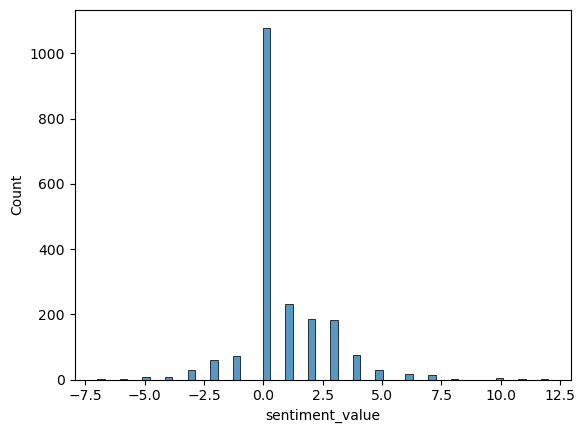

In [21]:
sns.histplot(mar_df['sentiment_value'])

<Axes: ylabel='sentiment_value'>

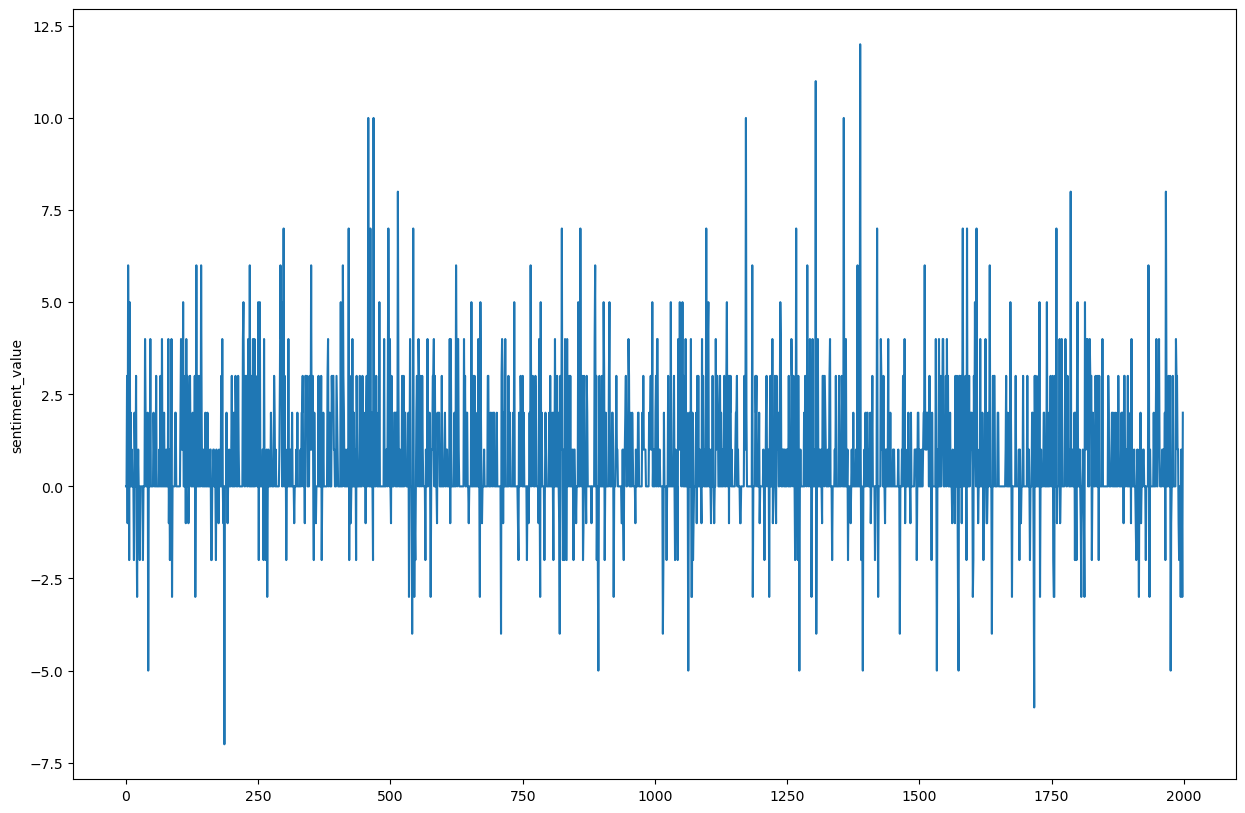

In [22]:
# Plot the sentiment values
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value', x=mar_df.index.values, data=mar_df)

In [23]:
freq = pd.Series(' '.join(mar_df['clean_text']).split()).value_counts()[0:20]

In [24]:
freq

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
dtype: int64

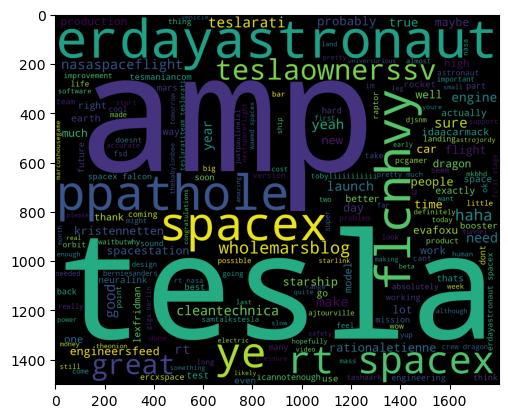

In [25]:
# Generate word cloud
string_Total = " ".join(mar_df["clean_text"])
wordcloud_stw = WordCloud(
    background_color='black',
    width=1800,
    height=1500
).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.show()

## Review Classification

In [26]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(mar_df["clean_text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [27]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
5,absence,1,0.000076
6,absolute,1,0.000076
7,absolutely,15,0.001133
8,absorb,1,0.000076
9,absorption,1,0.000076


In [28]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(mar_df["clean_text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [29]:
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
"""from sklearn.feature_extraction.text import CountVectorizer
#Extract the n-grams from the clean text:
alltext = " ".join(mar_df['clean_text'])
ngram_vectorizer = CountVectorizer(ngram_range=(2,2))
ngram_counts = ngram_vectorizer.fit_transform([alltext])
ngram_features =ngram_vectorizer.get_feature_names_out()
#Get the counts of each n-gram:
ngram_counts_sum = ngram_counts.sum(axis=0)
ngram_counts_list = ngram_counts_sum.tolist()[0]
Bigram_df = pd.DataFrame({'Bi-gram':ngram_features,'counts':ngram_counts_list})
top_20_bi_grams = Bigram_df.nlargest(20,'counts')"""

'from sklearn.feature_extraction.text import CountVectorizer\n#Extract the n-grams from the clean text:\nalltext = " ".join(mar_df[\'clean_text\'])\nngram_vectorizer = CountVectorizer(ngram_range=(2,2))\nngram_counts = ngram_vectorizer.fit_transform([alltext])\nngram_features =ngram_vectorizer.get_feature_names_out()\n#Get the counts of each n-gram:\nngram_counts_sum = ngram_counts.sum(axis=0)\nngram_counts_list = ngram_counts_sum.tolist()[0]\nBigram_df = pd.DataFrame({\'Bi-gram\':ngram_features,\'counts\':ngram_counts_list})\ntop_20_bi_grams = Bigram_df.nlargest(20,\'counts\')'

In [31]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(mar_df['clean_text'])
bi_gram_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_20_bi_grams = bi_gram_df.sum().nlargest(20)

In [32]:
top_20_bi_grams

rt spacex                  71
spacex falcon              17
erdayastronaut spacex      16
pretty much                12
rt nasa                    12
waemd spacex               11
first stage                10
giga berlin                10
teslaratiteam teslarati    10
erdayastronaut flcnhvy      9
falcon first                9
nasa spacex                 9
astrobehnken astrodoug      8
coming soon                 8
crew dragon                 8
flcnhvy tesla               8
spacex dragon               8
static fire                 8
thesheetztweetz waemd       8
course still                7
dtype: int64

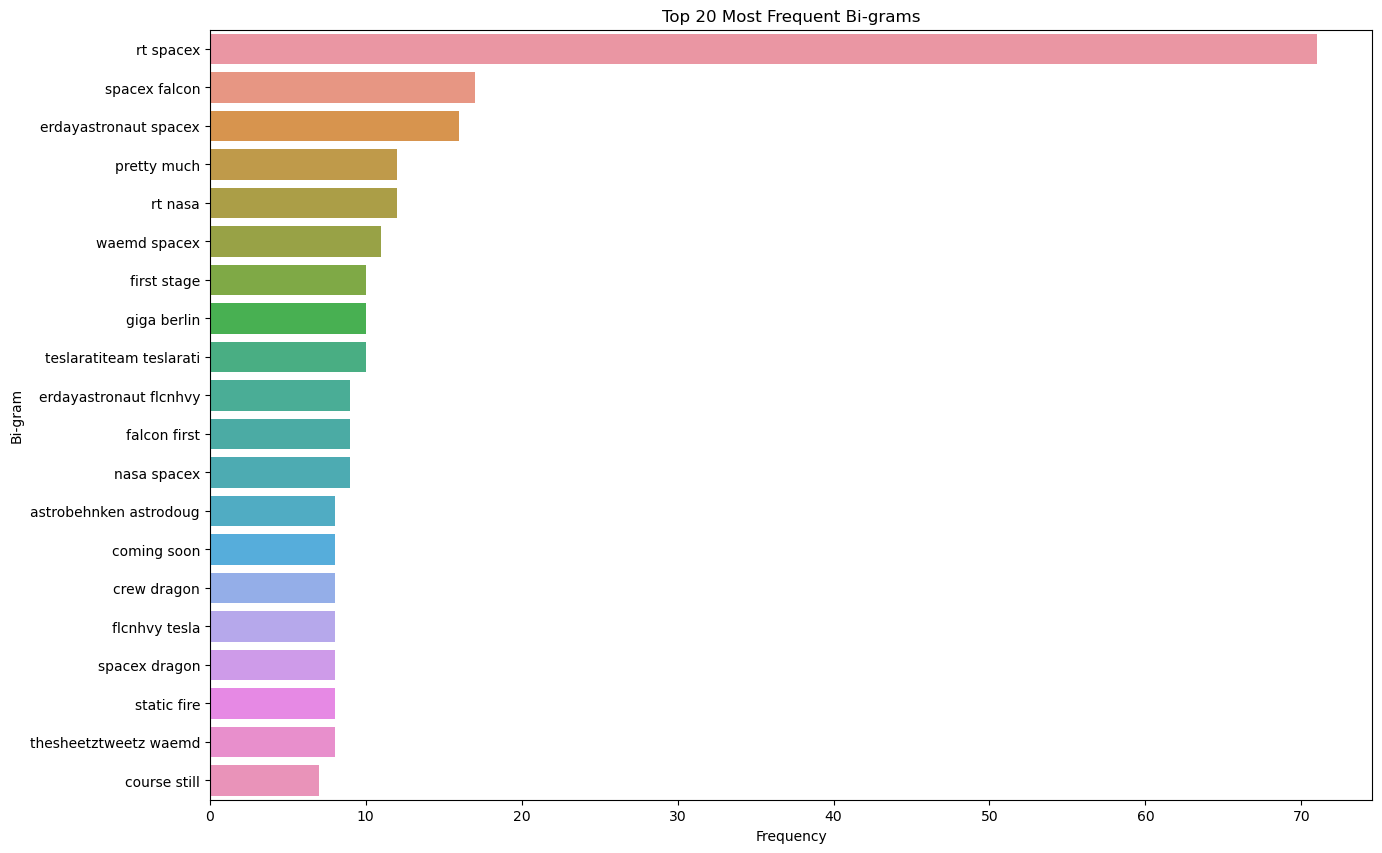

In [33]:
plt.figure(figsize=(15, 10))
sns.barplot(y=top_20_bi_grams.index, x=top_20_bi_grams.values)
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.title('Top 20 Most Frequent Bi-grams')
plt.show()

In [34]:
vectorizer = CountVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(mar_df['clean_text'])
tri_gram_df=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
top_20_tri_grams = tri_gram_df.sum().nlargest(20)

In [36]:
top_20_tri_grams

rt spacex falcon                           17
falcon first stage                          9
spacex falcon first                         8
thesheetztweetz waemd spacex                8
course still love                           7
ppathole thesheetztweetz waemd              7
waemd spacex spacexstarlink                 7
first stage landed                          6
rt spacex liftoff                           6
spacex spacexstarlink wanationalguard       6
casparstanley ercxspace marcushousegame     5
ercxspace marcushousegame felixschlang      5
first operational mission                   5
rt spacex dragon                            5
spacex felixschlang marcushousegame         5
still love droneship                        5
ajtourville commaai tesmaniancom            4
alexavoigt mikezimon wholemarsblog          4
cfsenergy cupplasma mit                     4
dragons first operational                   4
dtype: int64

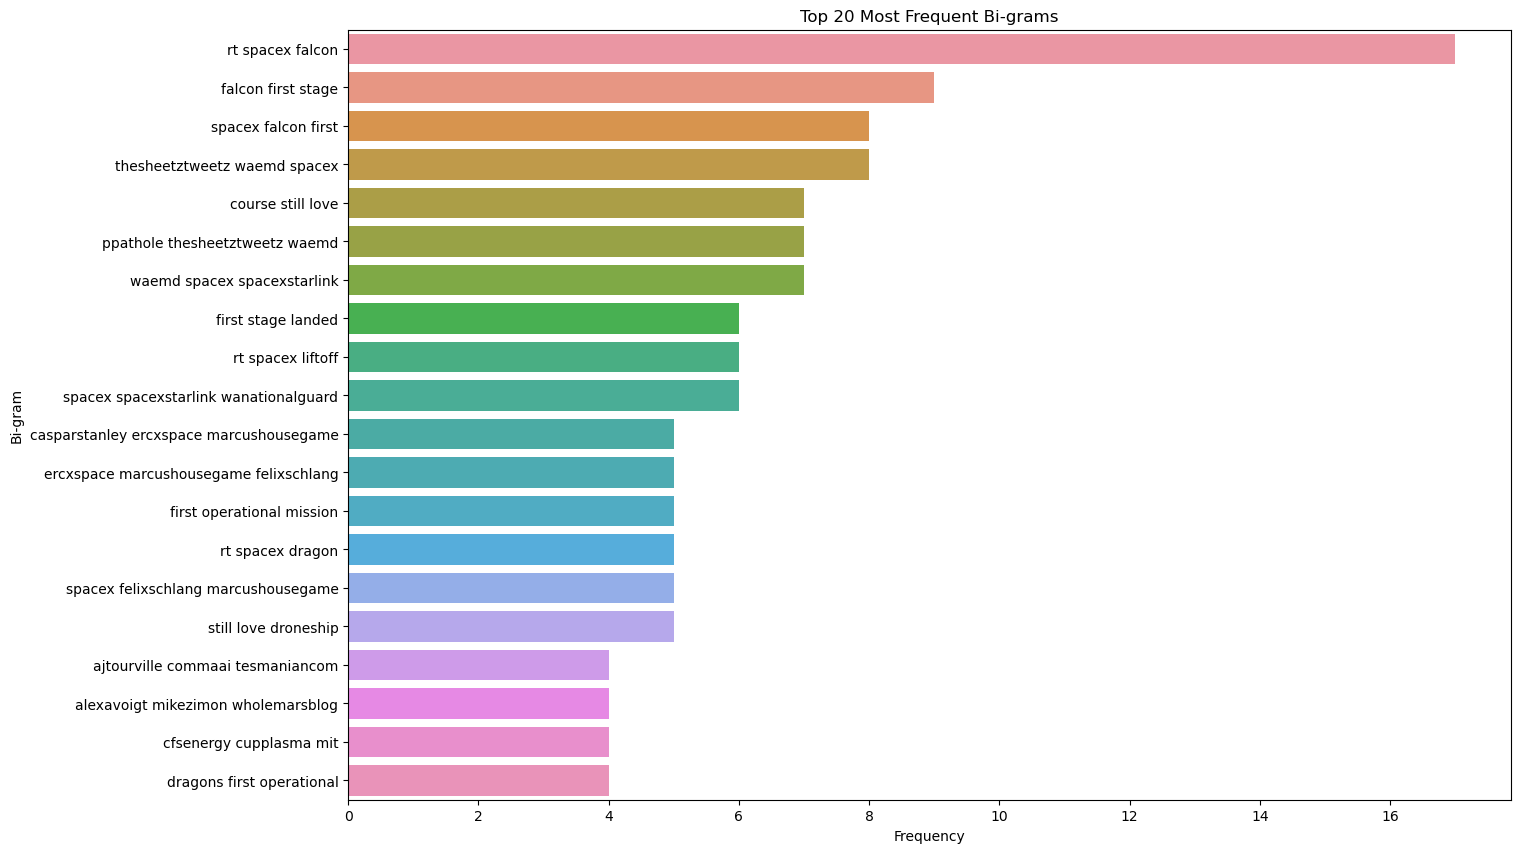

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(y=top_20_tri_grams.index, x=top_20_tri_grams.values)
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.title('Top 20 Most Frequent Bi-grams')
plt.show()